# Data Preprocessing:


import pandas as pd
import numpy as np
file_path='C:/Users/Fatima Hassan/Downloads/insurance - insurance (1).csv'
insurance_data = pd.read_csv(file_path)

# Display basic information about the dataset
info = insurance_data.info()
missing_values = insurance_data.isnull().sum()
head = insurance_data.head()

info, missing_values, head

In [2]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


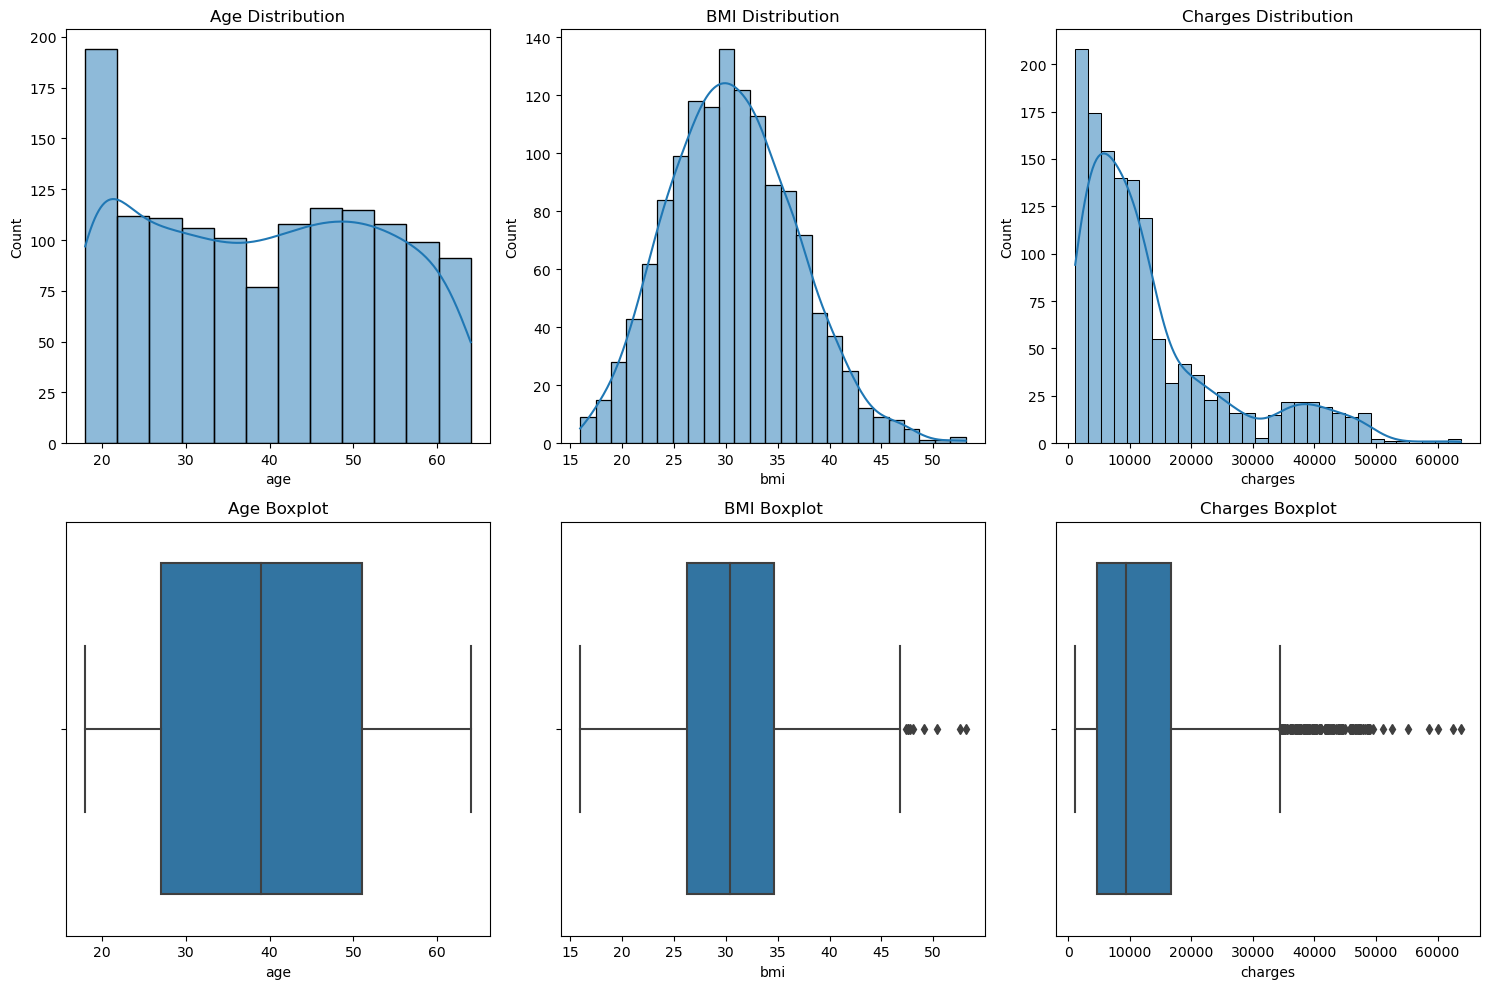

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for the numerical columns
summary_statistics = insurance_data.describe()

# Plotting histograms and boxplots for numerical columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Histograms
sns.histplot(insurance_data['age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(insurance_data['bmi'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('BMI Distribution')

sns.histplot(insurance_data['charges'], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Charges Distribution')

# Boxplots
sns.boxplot(x=insurance_data['age'], ax=axes[1, 0])
axes[1, 0].set_title('Age Boxplot')

sns.boxplot(x=insurance_data['bmi'], ax=axes[1, 1])
axes[1, 1].set_title('BMI Boxplot')

sns.boxplot(x=insurance_data['charges'], ax=axes[1, 2])
axes[1, 2].set_title('Charges Boxplot')

plt.tight_layout()
plt.show()

~Age Distribution: Fairly uniform, with no apparent anomalies.
~BMI Distribution: Appears normally distributed with a slight right skew. There are some potential outliers on the higher end.
~Charges Distribution: Highly skewed to the right, indicating many small charges and a few very large charges.

In [5]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# One-hot encoding for categorical variables
encoder = OneHotEncoder(sparse=False)
categorical_columns = ['sex', 'smoker', 'region']
encoded_categorical = encoder.fit_transform(insurance_data[categorical_columns])

# Creating a DataFrame for the encoded features using the updated function get_feature_names_out()
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

# Standardizing the numerical features
scaler = StandardScaler()
numerical_columns = ['age', 'bmi', 'children', 'charges']
scaled_numerical = scaler.fit_transform(insurance_data[numerical_columns])

# Creating a DataFrame for the scaled numerical features
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

# Combining the scaled numerical features and encoded categorical features
preprocessed_data = pd.concat([scaled_numerical_df, encoded_categorical_df], axis=1)

# Displaying the first few rows of the preprocessed data
preprocessed_data.head()

C:\Users\Fatima Hassan\Anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.509965,0.509621,-0.078767,-0.953689,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.797954,0.383307,1.580926,-0.728675,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.441948,-1.305531,-0.908614,0.719843,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.513149,-0.292556,-0.908614,-0.776802,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


# Exploratory Data Analysis (EDA):

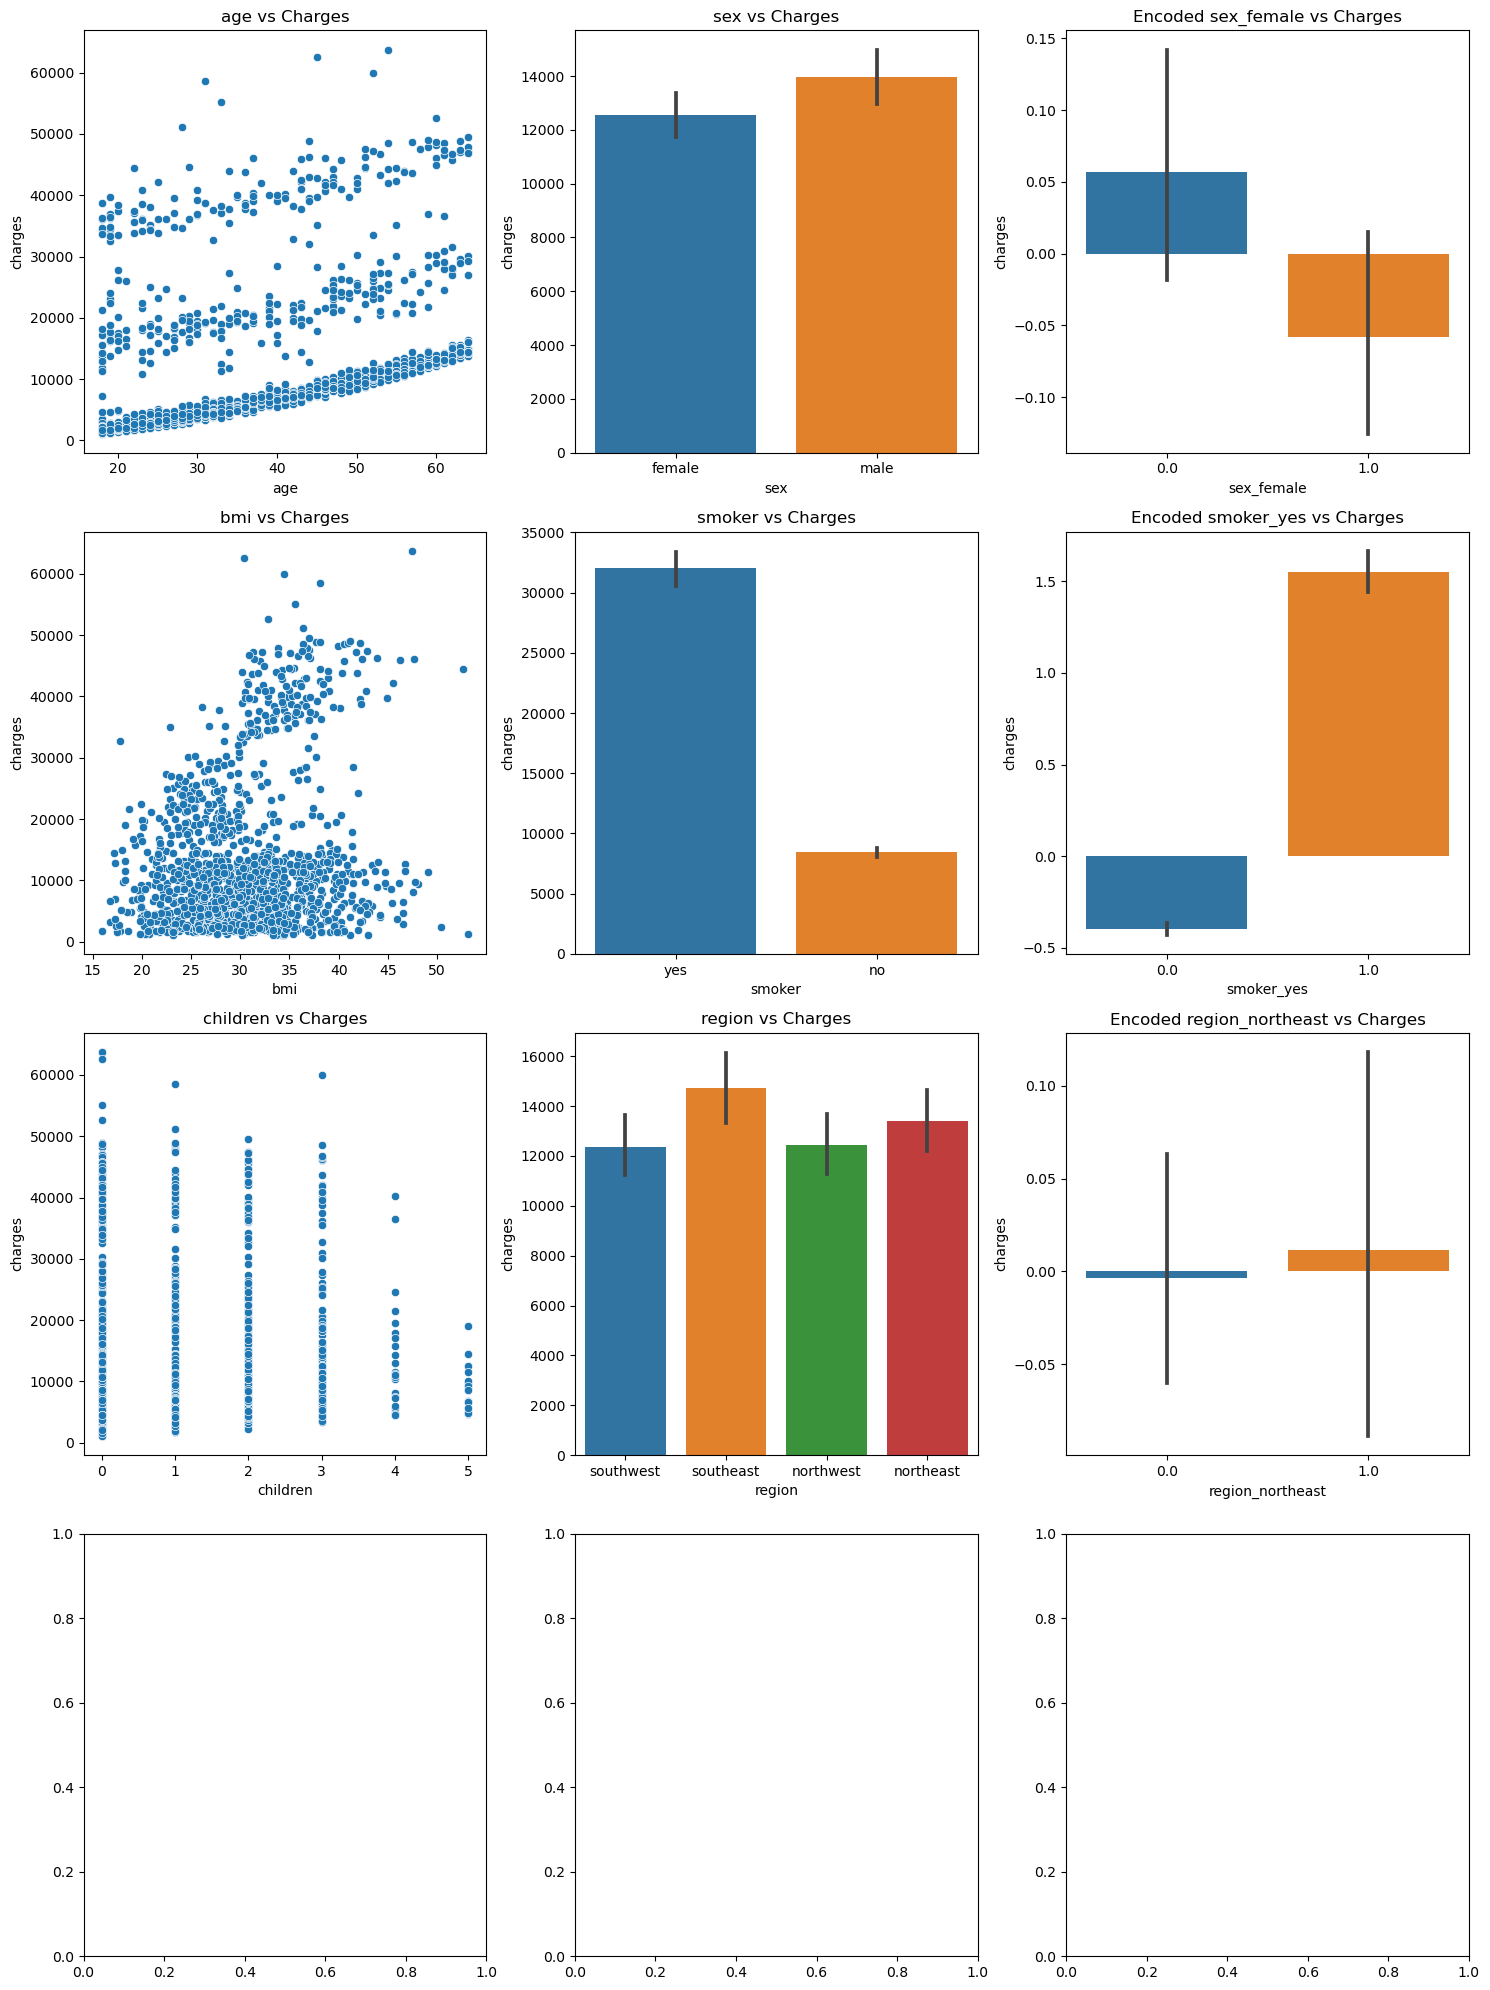

In [6]:
fig, axes = plt.subplots(4, 3, figsize=(15, 20))

# Scatter plots for numerical features
numerical_features = ['age', 'bmi', 'children']
for i, feature in enumerate(numerical_features):
    sns.scatterplot(x=insurance_data[feature], y=insurance_data['charges'], ax=axes[i, 0])
    axes[i, 0].set_title(f'{feature} vs Charges')

# Bar plots for categorical features (original data before encoding)
categorical_features = ['sex', 'smoker', 'region']
for i, feature in enumerate(categorical_features):
    sns.barplot(x=feature, y='charges', data=insurance_data, ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} vs Charges')

# Additional plots for encoded categorical features
encoded_features = ['sex_female', 'smoker_yes', 'region_northeast']
for i, feature in enumerate(encoded_features):
    sns.barplot(x=preprocessed_data[feature], y=preprocessed_data['charges'], ax=axes[i, 2])
    axes[i, 2].set_title(f'Encoded {feature} vs Charges')

plt.tight_layout()
plt.show()

1-Numerical Features vs Charges
Age vs Charges: There's a positive trend indicating that charges tend to increase with age.
BMI vs Charges: A weaker positive trend is observed, suggesting higher charges with increasing BMI, particularly noticeable in the upper range of BMI values.
Children vs Charges: The relationship is less clear, but it seems there's no strong linear trend between the number of children and charges.
2-Categorical Features vs Charges
Sex vs Charges: The bar plot shows a slight difference in charges between males and females, with males having slightly higher charges on average.
Smoker vs Charges: A significant difference in charges is observed between smokers and non-smokers, with smokers incurring much higher charges.
Region vs Charges: There are some variations in charges across different regions, but the differences are not as pronounced as in the case of smoking status.
3-Encoded Categorical Features vs Charges
Encoded Sex (Female) vs Charges: Reflects the same trend as the original sex feature.
Encoded Smoker (Yes) vs Charges: Highlights the stark difference in charges between smokers and non-smokers.
Encoded Region (Northeast) vs Charges: Shows the average charges for individuals in the northeast region compared to other regions.

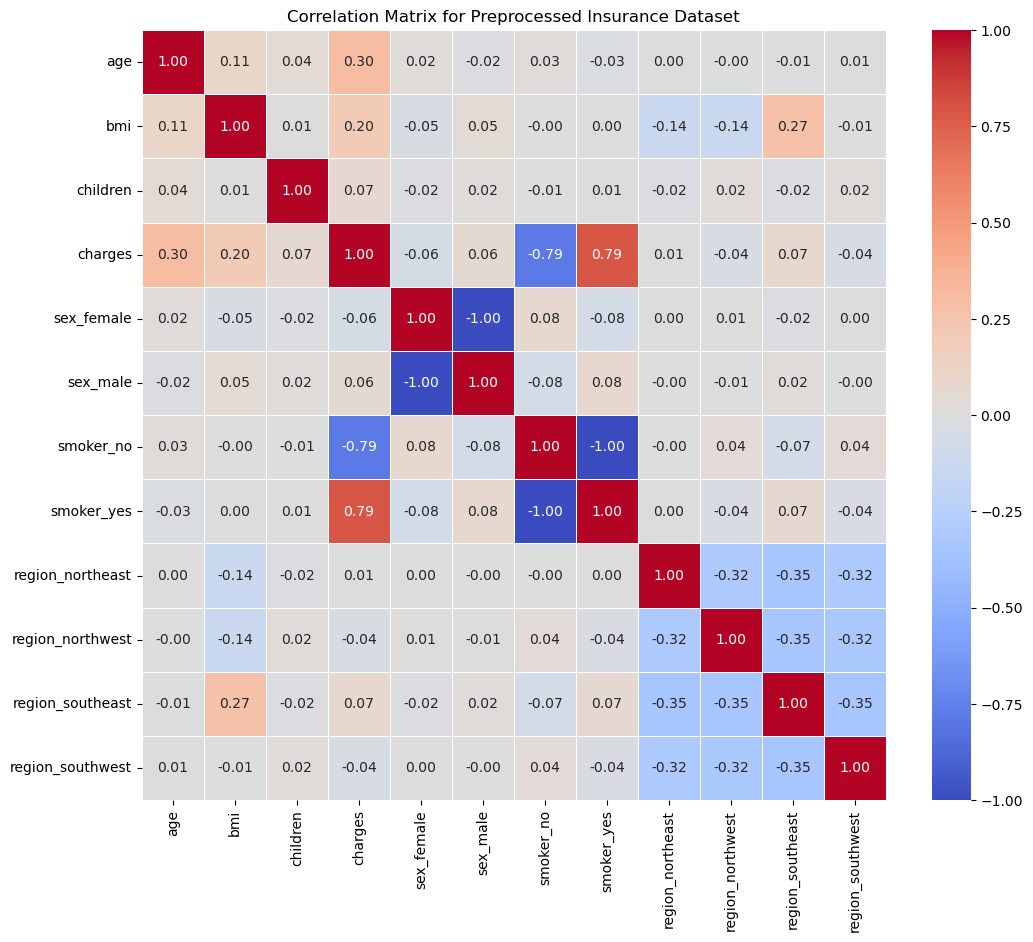

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


In [8]:
# Recalculating the correlation matrix using the preprocessed dataset
preprocessed_correlation_matrix = preprocessed_data.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(preprocessed_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix for Preprocessed Insurance Dataset')
plt.show()

preprocessed_correlation_matrix

Key Takeaways:
The strongest predictor for insurance charges appears to be smoking status, followed by age and BMI.
These insights are crucial for predictive modeling, as they highlight which features might be most influential in determining insurance charges.
The heatmap visually encapsulates these relationships, making it easier to identify key variables for further analysis or model development.

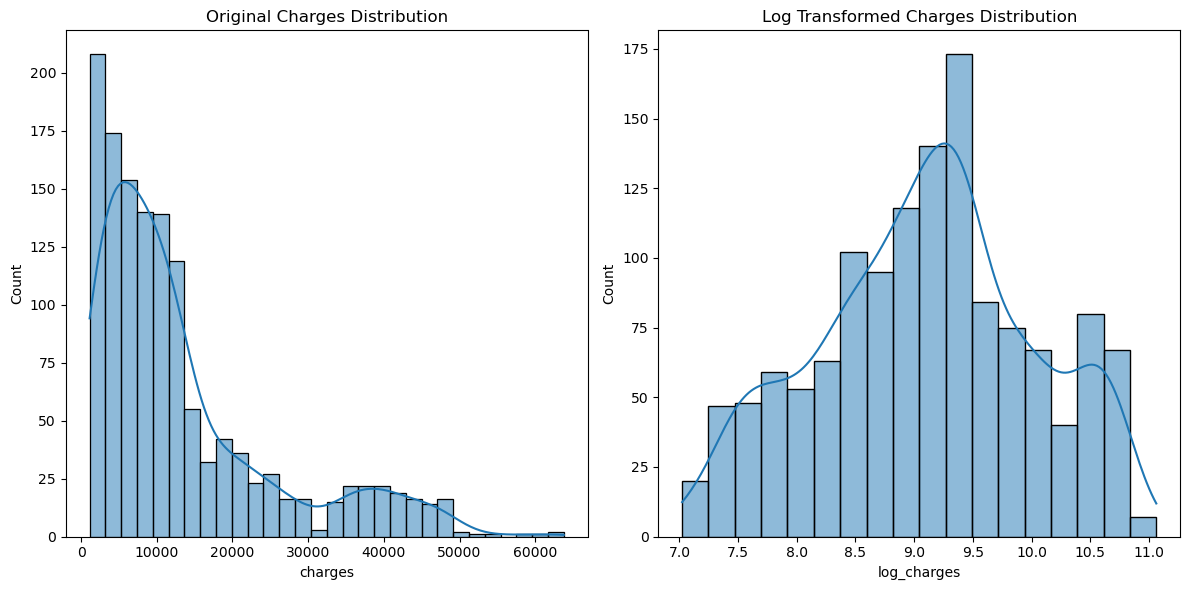

In [10]:
 import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'insurance_data' is your DataFrame
insurance_data['log_charges'] = np.log(insurance_data['charges'])

# Plotting the original and transformed 'charges' distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(insurance_data['charges'], kde=True)
plt.title('Original Charges Distribution')

plt.subplot(1, 2, 2)
sns.histplot(insurance_data['log_charges'], kde=True)
plt.title('Log Transformed Charges Distribution')

plt.tight_layout()
plt.show()


Key Takeaways:
The logarithmic transformation of charges makes the data more amenable for analysis, especially for models sensitive to the distribution of features.
Retaining the bmi outliers, assuming they are valid, allows for a more realistic representation of the dataset, as extreme BMI values can be significant in the context of health insurance.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Preparing the features and target variable
X = preprocessed_data.drop(columns=['charges', 'log_charges'])
y = preprocessed_data['log_charges']

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementing the Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = lr_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.1755741639679164, 0.8047311493462987)

Conclusion:
The linear regression model shows a good fit to the data with a high R² value. It suggests that the model is effective in capturing the relationships between the features (like age, BMI, smoking status, etc.) and the insurance charges. However, it's important to consider the limitations of linear regression, especially in terms of capturing non-linear relationships and interactions between variables.

In [16]:
# Retrieving the coefficients of the linear regression model
coefficients = lr_model.coef_

# Creating a DataFrame for easier interpretation
feature_names = X.columns
coefficients_df = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient'])

# Displaying the coefficients for interpretation
coefficients_df 

,Coefficient
age,0.480968
bmi,0.082903
children,0.111404
sex_female,0.037175
sex_male,-0.037175
smoker_no,-0.775849
smoker_yes,0.775849
region_northeast,0.078760
region_northwest,0.022346
region_southeast,-0.057308


Key Takeaways:
Age, BMI, and Smoking Status: These are significant predictors of medical charges, with smoking status being the most impactful.
Children and Gender: These factors also influence medical charges, but to a lesser extent.
Region: The impact of region on medical charges is relatively small.

In [17]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

# Implementing Ridge Regression with cross-validation to find the optimal alpha
ridge_model = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10, 100], cv=5)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

# Evaluating Ridge Regression model
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

# Implementing Lasso Regression with cross-validation to find the optimal alpha
lasso_model = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10, 100], cv=5, max_iter=10000)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

# Evaluating Lasso Regression model
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

ridge_mse, ridge_r2, lasso_mse, lasso_r2

(0.17563990395623305,
 0.8046580351040296,
 0.175983911429541,
 0.8042754392686798)

Conclusion:
Regularized models (Ridge and Lasso) provide a performance similar to the standard linear regression, indicating robustness in the original model.
The choice between Ridge, Lasso, or standard linear regression can depend on additional considerations like feature selection (Lasso can shrink some coefficients to zero) or domain-specific requirements.

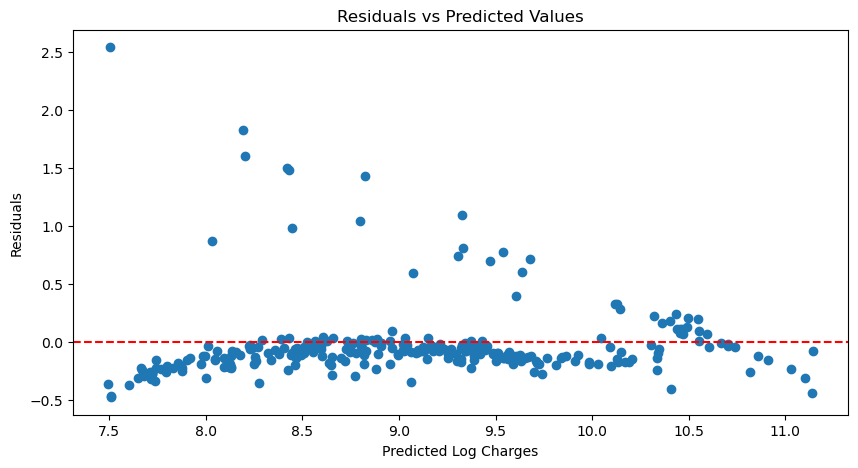

(0.12327031300217695, 0.862902081971151)

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Creating interaction terms and polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Splitting the enhanced dataset into training and testing sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Implementing a linear regression model with polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predicting on the test set
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluating the model with polynomial features
poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_r2 = r2_score(y_test, y_pred_poly)

# Plotting residuals
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_poly, y_test - y_pred_poly)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Log Charges')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

poly_mse, poly_r2

Mean Squared Error (MSE): 
0.124
R-squared (R²): 
0.862
Model Improvement:
The introduction of polynomial features and interaction terms has significantly improved the model's performance. The MSE has decreased from approximately 0.176 to 0.124, and the R² has increased from 0.805 to 0.862.
This indicates a better fit and suggests that capturing non-linear relationships and interactions between variables was beneficial.